In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs,  make_circles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [3]:
from sklearn.cluster import DBSCAN

## 원형 데이터 

In [4]:
# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

In [5]:
color_dict = {0:'black',1:'red',2:'green',3:'yellow',4:'brown'}

Text(0.5, 1.0, 'Circle Data')

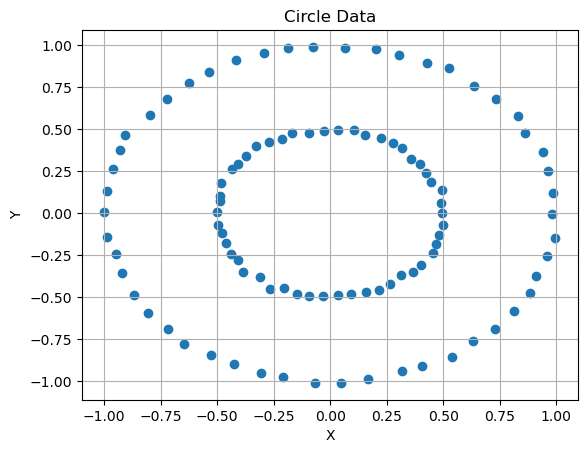

In [14]:
fig,ax = plt.subplots(1,1)
ax.scatter(circle_points[:,0],circle_points[:,1])
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle Data')

## DBSCAN

    - DBSCAN 용어
        - epsilon: 클러스터의 반경
        - minPts: 클러스터를 이루는 개체의 최솟값
        - core point: 반경 epsilon 내에 minPts 개 이상의 점이 존재하는 중심점
        - border point: 군집의 중심이 되지는 못하지만, 군집에 속하는 점
        - noise point: 군집에 포함되지 못하는 점

    - DBSCAN 알고리즘의 순서
  
        1. 임의의 점 p를 설정하고, p를 포함하여 주어진 클러스터의 반경(elipson) 안에 포함되어 있는 점들의 개수를 세요.
        2. 만일 해당 원에 minPts 개 이상의 점이 포함되어 있으면, 해당 점 p를 core point로 간주하고 원에 포함된 점들을 하나의 클러스터로 묶어요.
        3. 해당 원에 minPts 개 미만의 점이 포함되어 있으면, 일단 pass 합시다.
        4. 모든 점에 대하여 돌아가면서 1~3 번의 과정을 반복하는데, 만일 새로운 점 p'가 core point가 되고 이 점이 기존의 클러스터(p를 core point로 하는)에 속한다면, 두 개의 클러스터는 연결되어 있다고 하며 하나의 클러스터로 묶어줘요.  
        5. 모든 점에 대하여 클러스터링 과정을 끝냈는데, 어떤 점을 중심으로 하더라도 클러스터에 속하지 못하는 점이 있으면 이를 noise point로 간주해요. 또한, 특정 군집에는 속하지만 core point가 아닌 점들을 border point라고 칭해요.

### DBSCAN - Circle

#### DBSCAN Model

In [69]:
epsilon, minPts = 0.2, 3

In [70]:
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)

In [71]:
circle_dbscan.fit(circle_points)

DBSCAN(eps=0.2, min_samples=3)

#### DBSCAN Model Graph

In [72]:
color_dict = {0:'black',1:'red',2:'yellow',3:'brown',4:'blue',5:'green',6:'purple'}

In [73]:
max_cnt = circle_dbscan.labels_.max() + 1

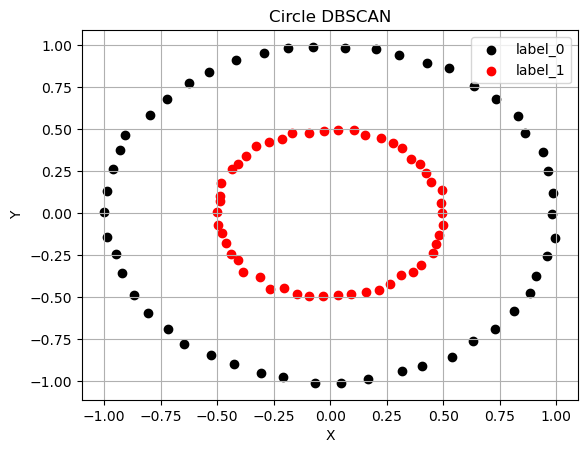

In [74]:
fig, ax = plt.subplots()
for cluster in range(max_cnt):
    sub_plot = circle_points[cluster == circle_dbscan.labels_]
    ax.scatter(sub_plot[:,0],sub_plot[:,1],c=color_dict[cluster],label='label_{}'.format(cluster))
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Circle DBSCAN')
ax.legend()
plt.show()

### DBSCAN - Moon

In [75]:
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

In [93]:
minPts , epsilon = 3, 0.2

In [94]:
moon_dbscan = DBSCAN(eps=epsilon,min_samples=minPts)

In [95]:
moon_dbscan.fit(moon_points)

DBSCAN(eps=0.2, min_samples=3)

In [97]:
moon_dbscan.labels_.max()

1

In [98]:
label_range = moon_dbscan.labels_.max() + 1

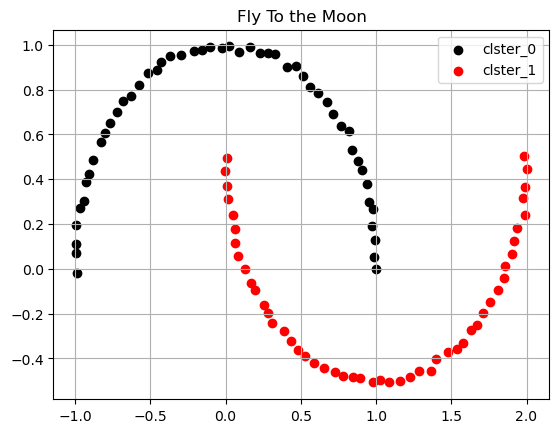

In [101]:
fig, ax = plt.subplots()
for cluster in range(label_range):
    sub_cluster = moon_points[cluster == moon_dbscan.labels_ ]
    ax.scatter(sub_cluster[:,0],sub_cluster[:,1],c=color_dict[cluster],label='clster_{}'.format(cluster))
ax.grid()
ax.legend()
ax.set_title('Fly To the Moon')
plt.show()

### DBSCAN - Diag

In [105]:
# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


/var/folders/2n/dypjcf651pz4rkj6w4rslb180000gn/T/ipykernel_55937/3134267654.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=cluster_sub_points[:, 0], y=cluster_sub_points[:, 1],palette="Spectral",label='cluster_{}'.format(cluster))
/var/folders/2n/dypjcf651pz4rkj6w4rslb180000gn/T/ipykernel_55937/3134267654.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=cluster_sub_points[:, 0], y=cluster_sub_points[:, 1],palette="Spectral",label='cluster_{}'.format(cluster))
/var/folders/2n/dypjcf651pz4rkj6w4rslb180000gn/T/ipykernel_55937/3134267654.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=cluster_sub_points[:, 0], y=cluster_sub_points[:, 1],palette="Spectral",label='cluster_{}'.format(cluster))


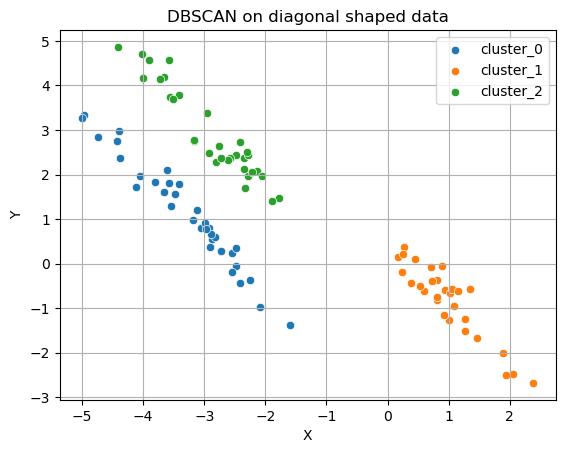

In [112]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    #ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
    sns.scatterplot(x=cluster_sub_points[:, 0], y=cluster_sub_points[:, 1],palette="Spectral",label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

## DBSCAN 알고리즘과 K-means 알고리즘의 소요 시간 비교


/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

# of samples: 100 / Elapsed time of K-means: 0.03932s / DBSCAN: 0.00064s
# of samples: 500 / Elapsed time of K-means: 0.00629s / DBSCAN: 0.00141s
# of samples: 1000 / Elapsed time of K-means: 0.00915s / DBSCAN: 0.00298s
# of samples: 2000 / Elapsed time of K-means: 0.01224s / DBSCAN: 0.00608s
# of samples: 5000 / Elapsed time of K-means: 0.09040s / DBSCAN: 0.03089s
# of samples: 7500 / Elapsed time of K-means: 0.12668s / DBSCAN: 0.04709s
# of samples: 10000 / Elapsed time of K-means: 0.09703s / DBSCAN: 0.07200s


/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# of samples: 20000 / Elapsed time of K-means: 0.09409s / DBSCAN: 0.25261s


/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# of samples: 30000 / Elapsed time of K-means: 0.21714s / DBSCAN: 0.43516s


/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# of samples: 40000 / Elapsed time of K-means: 0.17466s / DBSCAN: 0.72002s


/Users/craigpark/miniconda/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# of samples: 50000 / Elapsed time of K-means: 0.17584s / DBSCAN: 1.05033s


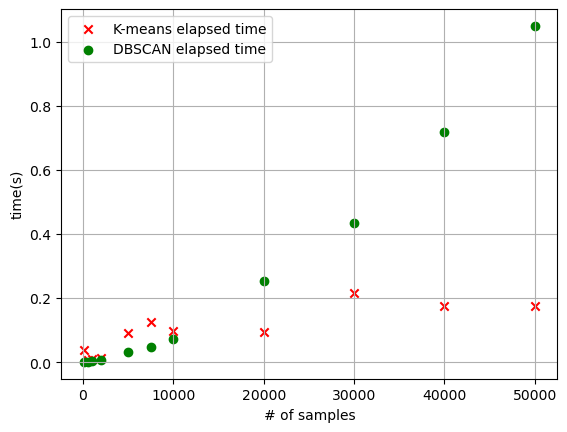

In [114]:
# DBSCAN 알고리즘과 K-means 알고리즘의 시간을 비교하는 코드 
import time
from sklearn.cluster import KMeans

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01) # 원형의 분포를 가지는 데이터 생성

    # K-means 시간을 측정
    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()

    # DBSCAN 시간을 측정
    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()

    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))

# K-means와 DBSCAN의 소요 시간 그래프화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()